# Descritptive Statistics

#### Raw Data

Industry: Financials
Comments Count: 2984
Submissions Count: 236
Total Texts: 3220
-------------------------
Industry: Technology
Comments Count: 24065
Submissions Count: 2252
Total Texts: 26317
-------------------------
Industry: Energy
Comments Count: 3030
Submissions Count: 272
Total Texts: 3302
-------------------------


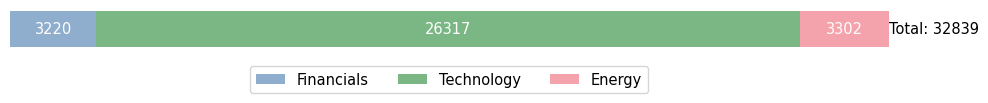

Total Texts for Financials: 3220
Total Texts for Technology: 26317
Total Texts for Energy: 3302


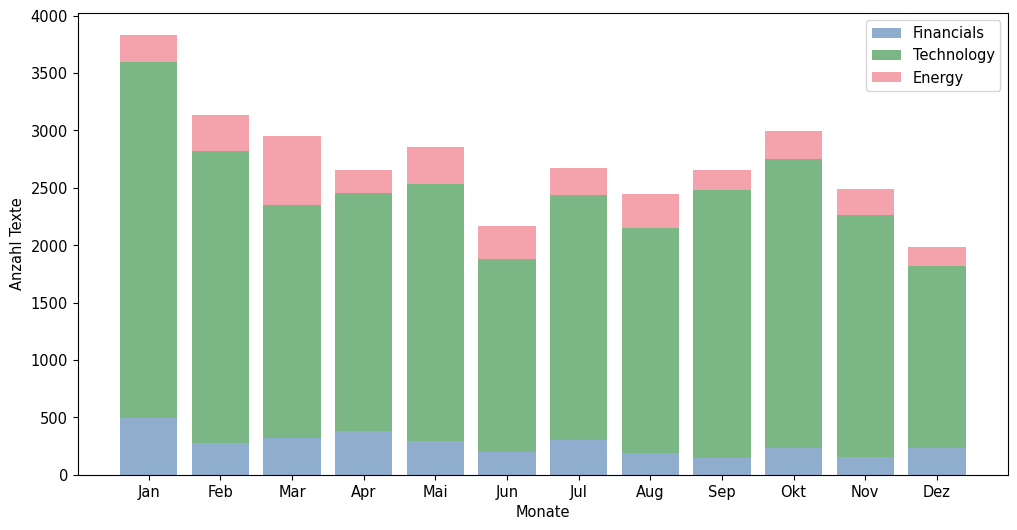

In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to count "created_utc" in a file
def count_created_utc(file_path):
    df = pd.read_csv(file_path)
    return df["created_utc"].count()

# Function to process all files in a folder
def process_folder(folder_path, industry_name):
    files = os.listdir(folder_path)
    comment_files = [f for f in files if f.startswith("RC_")]
    submission_files = [f for f in files if f.startswith("RS_")]

    comments_count = sum(count_created_utc(os.path.join(folder_path, f)) for f in comment_files)
    submissions_count = sum(count_created_utc(os.path.join(folder_path, f)) for f in submission_files)

    total_texts = comments_count + submissions_count

    print(f"Industry: {industry_name}")
    print(f"Comments Count: {comments_count}")
    print(f"Submissions Count: {submissions_count}")
    print(f"Total Texts: {total_texts}")
    print("-------------------------")

    return total_texts

# Process each industry folder and calculate the overall sum
industries = ["Financials", "Technology", "Energy"]
total_texts_counts = [process_folder(f"temp_{industry.lower()}", industry) for industry in industries]

plt.figure(figsize=(10, 1.3)) # Adjusting the figure size
left = 0
colors = ['#4477AA', '#228833', '#EE6677']
handles = [] # To store the handle for the legend

for i, industry in enumerate(industries):
    bar = plt.barh("All Industries", total_texts_counts[i], left=left, color=colors[i], alpha=0.6, height=1) # Height is set to a small value for a thin bar
    plt.text(left + total_texts_counts[i]/2, 0, str(total_texts_counts[i]), color='white', ha='center', va='center') # Displaying values inside the bar
    left += total_texts_counts[i]
    handles.append(bar) # Add the handle for the legend

plt.text(left, 0, f'Total: {sum(total_texts_counts)}', color='black', ha='left', va='center') # Displaying total at the end of the bar

# Determine the total width of the bar
total_width = sum(total_texts_counts)

# Set the x-limits of the plot to match the total width of the bar
plt.xlim(0, total_width)

# Create a custom legend below the bar
plt.legend(handles, industries, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(industries))

plt.axis('off') # This will turn off the axis

plt.tight_layout()

# Grafik als PDF speichern
plt.savefig('Graphics/0 Total Texts.pdf', bbox_inches='tight')

plt.show()

# Output the numbers
for i, industry in enumerate(industries):
    print(f"Total Texts for {industry}:", total_texts_counts[i])


# Assuming you have a function that can extract monthly data given a file_path and month as arguments:
def count_created_utc_monthly(file_path, month):
    df = pd.read_csv(file_path)
    df['created_month'] = pd.to_datetime(df['created_utc'], unit='s').dt.month
    return df[df['created_month'] == month]["created_utc"].count()


def process_folder_monthly(folder_path, industry_name):
    files = os.listdir(folder_path)
    comment_files = [f for f in files if f.startswith("RC_")]
    submission_files = [f for f in files if f.startswith("RS_")]

    monthly_counts = []

    for month in range(1, 13):
        comments_count = sum(count_created_utc_monthly(os.path.join(folder_path, f), month) for f in comment_files)
        submissions_count = sum(count_created_utc_monthly(os.path.join(folder_path, f), month) for f in submission_files)
        total_texts = comments_count + submissions_count
        monthly_counts.append(total_texts)

    return monthly_counts

# Process monthly data for each industry
monthly_data = {}
for industry in industries:
    monthly_data[industry] = process_folder_monthly(f"temp_{industry.lower()}", industry)

# Plotting the stacked bar chart on a monthly basis
plt.figure(figsize=(12, 6))
months = list(range(1, 13))
bottom = [0] * 12

for i, industry in enumerate(industries):
    plt.bar(months, monthly_data[industry], bottom=bottom, color=colors[i], alpha=0.6, label=industry)
    bottom = [x + y for x, y in zip(bottom, monthly_data[industry])]

plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'])
plt.xlabel('Monate')
plt.ylabel('Anzahl Texte')
plt.legend()

# Grafik als PDF speichern
plt.savefig('Graphics/0 Monthly Texts.pdf', bbox_inches='tight')

plt.show()


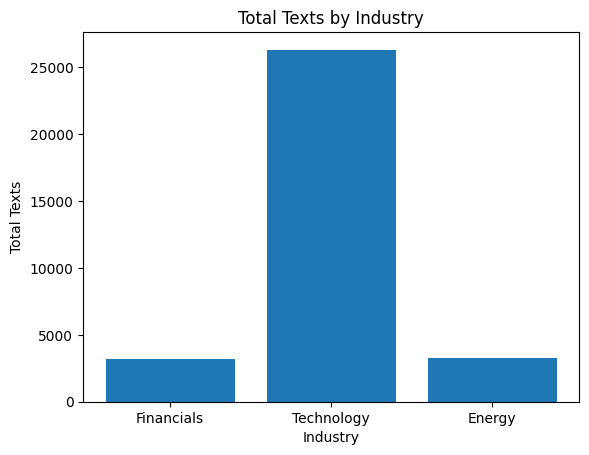

In [14]:
import matplotlib.pyplot as plt

# Define the industries and corresponding Total Texts
industries = ['Financials', 'Technology', 'Energy']
total_texts = [3220, 26317, 3302]

# Plot the bar chart
plt.bar(industries, total_texts)

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Total Texts')
plt.title('Total Texts by Industry')

# Show the plot
plt.show()


#### Standard Descriptive Statistics after Preprocessing

In [38]:
import pandas as pd

# Load data
sentiment_data_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_data_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_data_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Define the sentiments and returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

# Function to calculate descriptive statistics
def descriptive_statistics(df, columns):
    return df[columns].describe()

# Sentiments descriptive statistics
sentiment_financials_stats = descriptive_statistics(sentiment_data_financials, sentiments)
sentiment_energy_stats = descriptive_statistics(sentiment_data_energy, sentiments)
sentiment_technology_stats = descriptive_statistics(sentiment_data_technology, sentiments)

# Returns descriptive statistics
returns_technology_stats = descriptive_statistics(returns_data, ['Technology Return'])
returns_financials_stats = descriptive_statistics(returns_data, ['Financials Return'])
returns_energy_stats = descriptive_statistics(returns_data, ['Energy Return'])

# Print results
print("Sentiment Financials:")
print(sentiment_financials_stats)
print("\nSentiment Energy:")
print(sentiment_energy_stats)
print("\nSentiment Technology:")
print(sentiment_technology_stats)
print("\nReturns for Technology:")
print(returns_technology_stats)
print("\nReturns for Financials:")
print(returns_financials_stats)
print("\nReturns for Energy:")
print(returns_energy_stats)


Sentiment Financials:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean          1.211326           4.154696       0.193370
std           2.541393           3.511908       1.800292
min          -6.000000          -1.000000      -8.000000
25%           0.000000           2.000000      -1.000000
50%           1.000000           3.000000       0.000000
75%           2.000000           5.000000       1.000000
max          16.000000          28.000000       9.000000

Sentiment Energy:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean          1.614641           4.480663       1.382597
std           2.337645           4.271228       1.976886
min          -4.000000          -2.000000      -2.000000
25%           0.000000           2.000000       0.000000
50%           1.000000           3.000000       1.000000
75%           3.000000           6.000000      

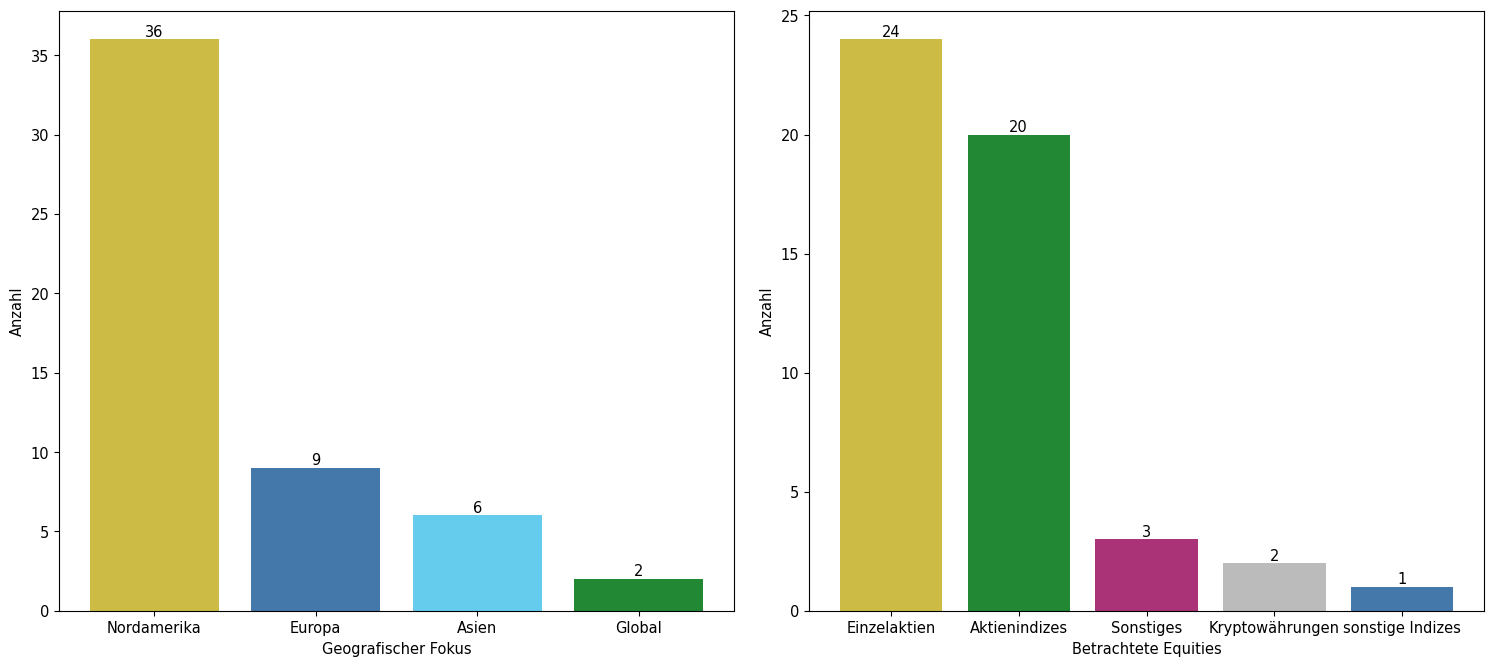

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten 1
data1 = {'Land': ['Nordamerika', 'Europa', 'Asien', 'Global'],
         'Anzahl': [36, 9, 6, 2],
         'Farben': ['#CCBB44', '#4477AA', '#66CCEE', '#228833']} 
df1 = pd.DataFrame(data1)

# Daten 2
data2 = {'Kategorie': ['Aktienindizes', 'sonstige Indizes', 'Einzelaktien', 'Kryptowährungen', 'Sonstiges'],
         'Anzahl': [20, 1, 24, 2, 3]}
df2 = pd.DataFrame(data2)
df2 = df2.sort_values('Anzahl',ascending=False) 
df2['Farben'] = ['#CCBB44', '#228833', '#AA3377', '#BBBBBB', '#4477AA']

# Setzen Sie die Schriftgröße hier
plt.rcParams.update({'font.size': 10.5})

# Figur erstellen
fig = plt.figure(figsize=(15, 6))

# Subplot 1 hinzufügen
ax1 = fig.add_axes([0, 0, 0.45, 1])  # left, bottom, width, height

# Balkendiagramm für Daten 1
bars1 = ax1.bar(df1['Land'], df1['Anzahl'], color = df1['Farben'])
ax1.set_xlabel('Geografischer Fokus')
ax1.set_ylabel('Anzahl')

# Hinzufügen von Datenlabels für Daten 1
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Subplot 2 hinzufügen
ax2 = fig.add_axes([0.5, 0, 0.45, 1])  # left, bottom, width, height

# Balkendiagramm für Daten 2
bars2 = ax2.bar(df2['Kategorie'], df2['Anzahl'], color = df2['Farben'])
ax2.set_xlabel('Betrachtete Equities')
ax2.set_ylabel('Anzahl')

# Hinzufügen von Datenlabels für Daten 2
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Grafik als PDF speichern
plt.savefig('Graphics/grafische Studienübersicht.pdf', bbox_inches='tight')

plt.show()


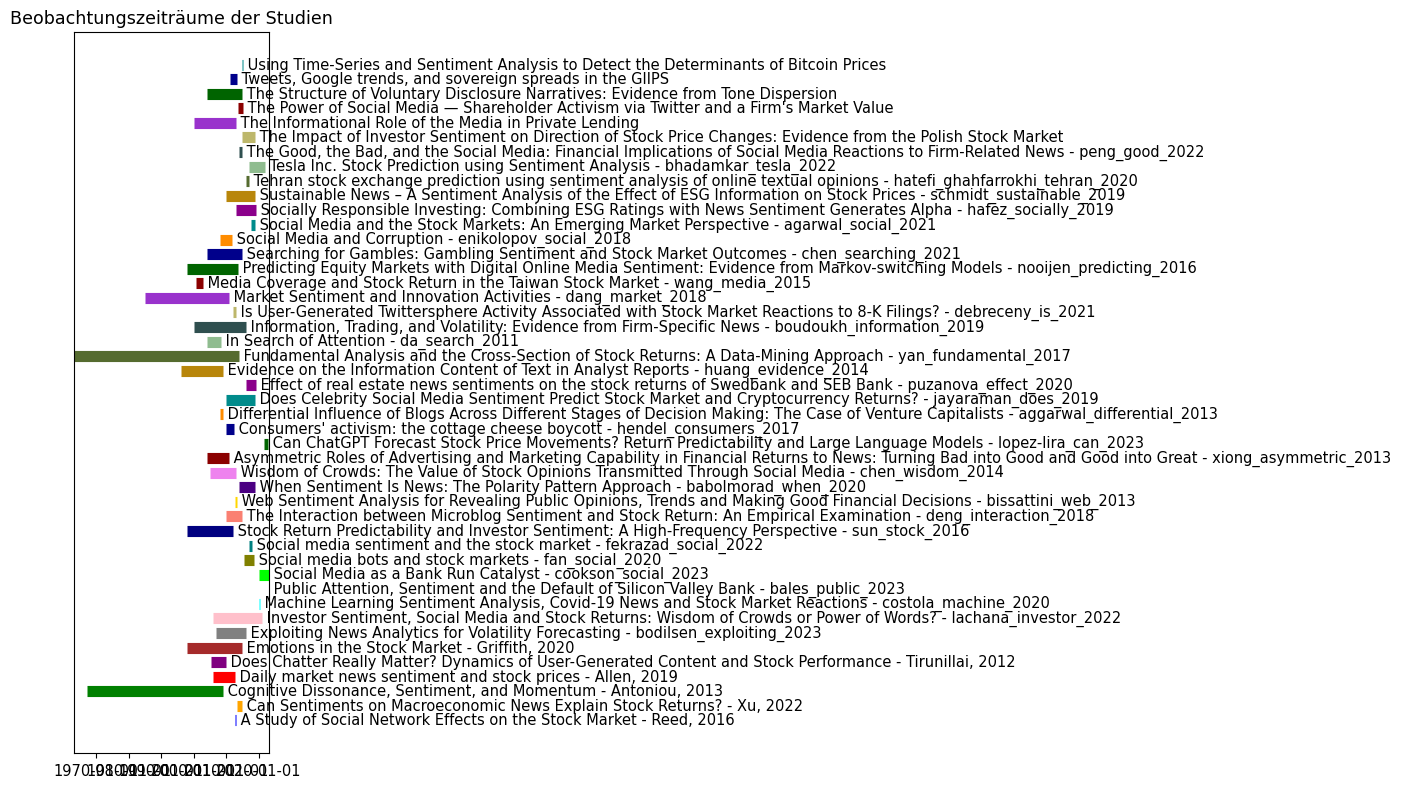

In [76]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Studiendaten mit Autoren, Zeitraum und Farbcodes
study_data = [
    ("A Study of Social Network Effects on the Stock Market - Reed, 2016", "2012-10-01", "2012-12-31", "blue"),
    ("Can Sentiments on Macroeconomic News Explain Stock Returns? - Xu, 2022", "2013-04-01", "2014-10-31", "orange"),
    ("Cognitive Dissonance, Sentiment, and Momentum - Antoniou, 2013", "1967-01-01", "2008-12-31", "green"),
    ("Daily market news sentiment and stock prices - Allen, 2019", "2006-01-01", "2012-10-31", "red"),
    ("Does Chatter Really Matter? Dynamics of User-Generated Content and Stock Performance - Tirunillai, 2012", "2005-06-01", "2010-01-31", "purple"),
    ("Emotions in the Stock Market - Griffith, 2020", "1998-01-01", "2014-12-31", "brown"),
    ("Exploiting News Analytics for Volatility Forecasting - bodilsen_exploiting_2023", "2007-01-01", "2015-12-31", "gray"),
    ("Investor Sentiment, Social Media and Stock Returns: Wisdom of Crowds or Power of Words? - lachana_investor_2022", "2006-01-01", "2020-12-31", "pink"),
    ("Machine Learning Sentiment Analysis, Covid-19 News and Stock Market Reactions - costola_machine_2020", "2020-01-01", "2020-06-30", "cyan"),
    ("Public Attention, Sentiment and the Default of Silicon Valley Bank - bales_public_2023", "2023-03-01", "2023-03-31", "magenta"),
    ("Social Media as a Bank Run Catalyst - cookson_social_2023", "2020-01-01", "2023-03-31", "lime"),
    ("Social media bots and stock markets - fan_social_2020", "2015-08-01", "2018-07-31", "olive"),
    ("Social media sentiment and the stock market - fekrazad_social_2022", "2017-01-01", "2017-12-31", "teal"),
    ("Stock Return Predictability and Investor Sentiment: A High-Frequency Perspective - sun_stock_2016", "1998-01-01", "2011-12-31", "navy"),
    ("The Interaction between Microblog Sentiment and Stock Return: An Empirical Examination - deng_interaction_2018", "2010-01-01", "2014-12-31", "salmon"),
    ("Web Sentiment Analysis for Revealing Public Opinions, Trends and Making Good Financial Decisions - bissattini_web_2013", "2012-08-01", "2013-05-31", "gold"),
    ("When Sentiment Is News: The Polarity Pattern Approach - babolmorad_when_2020", "2014-01-01", "2018-12-31", "indigo"),
    ("Wisdom of Crowds: The Value of Stock Opinions Transmitted Through Social Media - chen_wisdom_2014", "2005-01-01", "2012-12-31", "violet"),
    ("Asymmetric Roles of Advertising and Marketing Capability in Financial Returns to News: Turning Bad into Good and Good into Great - xiong_asymmetric_2013", "2004-01-01", "2010-12-31", "darkred"),
    ("Can ChatGPT Forecast Stock Price Movements? Return Predictability and Large Language Models - lopez-lira_can_2023", "2021-10-01", "2022-12-31", "darkgreen"),
    ("Consumers' activism: the cottage cheese boycott - hendel_consumers_2017", "2010-01-01", "2012-04-30", "darkblue"),
    ("Differential Influence of Blogs Across Different Stages of Decision Making: The Case of Venture Capitalists - aggarwal_differential_2013", "2008-01-01", "2008-12-31", "darkorange"),
    ("Does Celebrity Social Media Sentiment Predict Stock Market and Cryptocurrency Returns? - jayaraman_does_2019", "2010-01-01", "2018-12-31", "darkcyan"),
    ("Effect of real estate news sentiments on the stock returns of Swedbank and SEB Bank - puzanova_effect_2020", "2016-01-01", "2019-02-28", "darkmagenta"),
    ("Evidence on the Information Content of Text in Analyst Reports - huang_evidence_2014", "1996-01-01", "2008-12-31", "darkgoldenrod"),
    ("Fundamental Analysis and the Cross-Section of Stock Returns: A Data-Mining Approach - yan_fundamental_2017", "1963-01-01", "2013-12-31", "darkolivegreen"),
    ("In Search of Attention - da_search_2011", "2004-01-01", "2008-06-30", "darkseagreen"),
    ("Information, Trading, and Volatility: Evidence from Firm-Specific News - boudoukh_information_2019", "2000-01-01", "2015-12-31", "darkslategray"),
    ("Is User-Generated Twittersphere Activity Associated with Stock Market Reactions to 8-K Filings? - debreceny_is_2021", "2012-01-01", "2012-12-31", "darkkhaki"),
    ("Market Sentiment and Innovation Activities - dang_market_2018", "1985-01-01", "2010-12-31", "darkorchid"),
    ("Media Coverage and Stock Return in the Taiwan Stock Market - wang_media_2015", "2000-10-01", "2002-12-31", "darkred"),
    ("Predicting Equity Markets with Digital Online Media Sentiment: Evidence from Markov-switching Models - nooijen_predicting_2016", "1998-01-01", "2013-06-30", "darkgreen"),
    ("Searching for Gambles: Gambling Sentiment and Stock Market Outcomes - chen_searching_2021", "2004-01-01", "2014-12-31", "darkblue"),
    ("Social Media and Corruption - enikolopov_social_2018", "2008-01-01", "2011-08-31", "darkorange"),
    ("Social Media and the Stock Markets: An Emerging Market Perspective - agarwal_social_2021", "2017-08-01", "2018-11-30", "darkcyan"),
    ("Socially Responsible Investing: Combining ESG Ratings with News Sentiment Generates Alpha - hafez_socially_2019", "2013-01-01", "2019-03-31", "darkmagenta"),
    ("Sustainable News – A Sentiment Analysis of the Effect of ESG Information on Stock Prices - schmidt_sustainable_2019", "2010-01-01", "2018-12-31", "darkgoldenrod"),
    ("Tehran stock exchange prediction using sentiment analysis of online textual opinions - hatefi_ghahfarrokhi_tehran_2020", "2016-01-01", "2016-12-31", "darkolivegreen"),
    ("Tesla Inc. Stock Prediction using Sentiment Analysis - bhadamkar_tesla_2022", "2017-01-01", "2021-12-31", "darkseagreen"),
    ("The Good, the Bad, and the Social Media: Financial Implications of Social Media Reactions to Firm-Related News - peng_good_2022", "2014-01-01", "2014-12-31", "darkslategray"),
    ("The Impact of Investor Sentiment on Direction of Stock Price Changes: Evidence from the Polish Stock Market", "2015-01-01", "2018-12-31", "darkkhaki"),
    ("The Informational Role of the Media in Private Lending", "2000-01-01", "2012-12-31", "darkorchid"),
    ("The Power of Social Media — Shareholder Activism via Twitter and a Firm's Market Value", "2013-08-01", "2015-03-31", "darkred"),
    ("The Structure of Voluntary Disclosure Narratives: Evidence from Tone Dispersion", "2004-01-01", "2014-12-31", "darkgreen"),
    ("Tweets, Google trends, and sovereign spreads in the GIIPS", "2011-05-01", "2013-05-31", "darkblue"),
    ("Using Time-Series and Sentiment Analysis to Detect the Determinants of Bitcoin Prices", "2014-10-01", "2015-01-31", "darkcyan"),
]

# Funktion zum Konvertieren von Datumszeichenfolgen in datetime-Objekte
def convert_date(date_str):
    return datetime.datetime.strptime(date_str, "%Y-%m-%d")

# Extrahiere Daten für den Zeitstrahl
study_names = [study[0] for study in study_data]
start_dates = [convert_date(study[1]) for study in study_data]
end_dates = [convert_date(study[2]) for study in study_data]
colors = [study[3] for study in study_data]

# Erstelle den Zeitstrahl
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(min(start_dates), max(end_dates))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Füge farbige Linien für jeden Beobachtungszeitraum hinzu
for i, study_name in enumerate(study_names):
    ax.hlines(i, xmin=start_dates[i], xmax=end_dates[i], color=colors[i], linewidth=8)
    ax.text(end_dates[i], i, f" {study_name}", verticalalignment="center")

# Anpassungen für bessere Darstellung
ax.yaxis.set_visible(False)
ax.set_title("Beobachtungszeiträume der Studien")
plt.tight_layout()
plt.show()


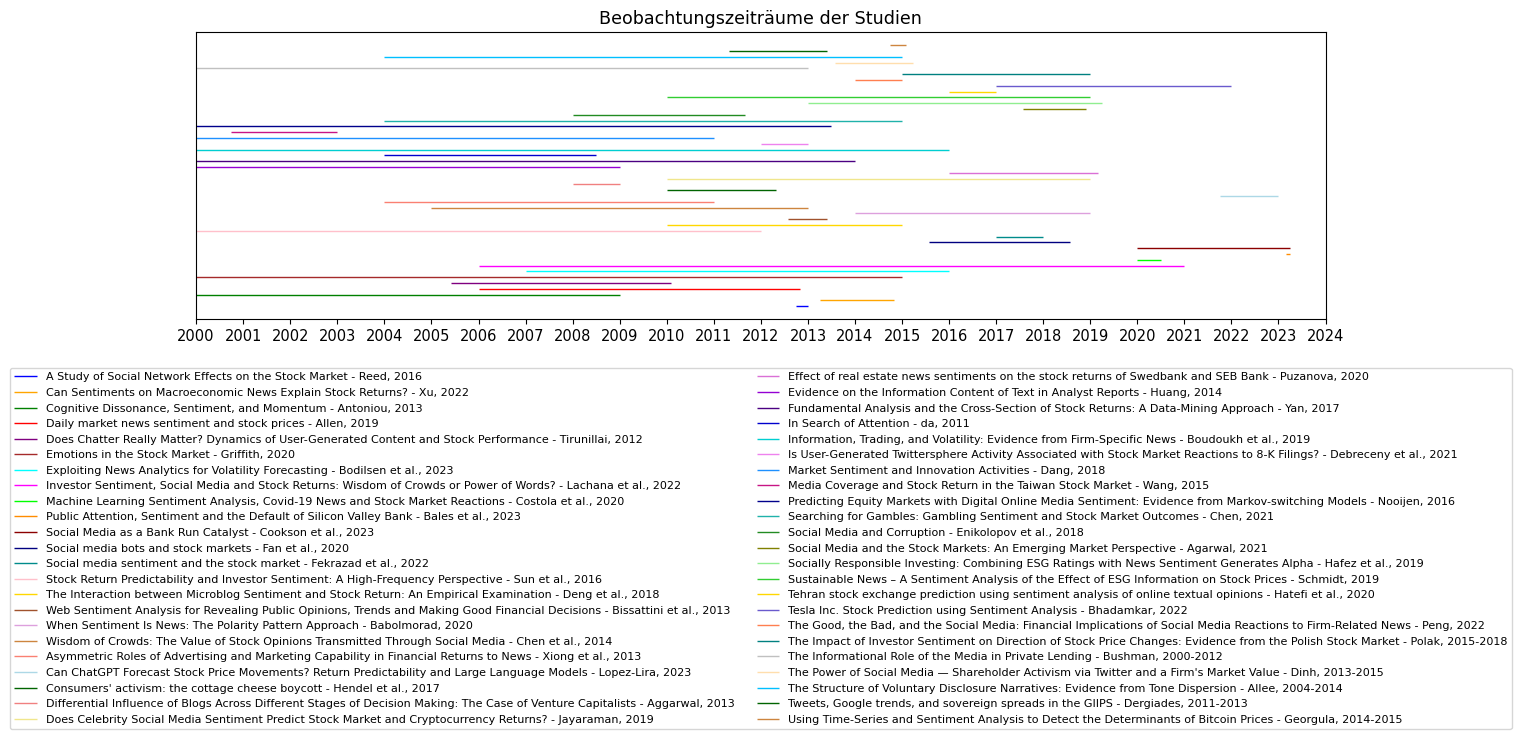

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Studiendaten mit Autoren, Zeitraum und Farbcodes
study_data = [
    ("A Study of Social Network Effects on the Stock Market - Reed, 2016", "2012-10-01", "2012-12-31", "blue"),
    ("Can Sentiments on Macroeconomic News Explain Stock Returns? - Xu, 2022", "2013-04-01", "2014-10-31", "orange"),
    ("Cognitive Dissonance, Sentiment, and Momentum - Antoniou, 2013", "1967-01-01", "2008-12-31", "green"),
    ("Daily market news sentiment and stock prices - Allen, 2019", "2006-01-01", "2012-10-31", "red"),
    ("Does Chatter Really Matter? Dynamics of User-Generated Content and Stock Performance - Tirunillai, 2012", "2005-06-01", "2010-01-31", "purple"),
    ("Emotions in the Stock Market - Griffith, 2020", "1998-01-01", "2014-12-31", "brown"),
    ("Exploiting News Analytics for Volatility Forecasting - Bodilsen et al., 2023", "2007-01-01", "2015-12-31", "cyan"),
    ("Investor Sentiment, Social Media and Stock Returns: Wisdom of Crowds or Power of Words? - Lachana et al., 2022", "2006-01-01", "2020-12-31", "magenta"),
    ("Machine Learning Sentiment Analysis, Covid-19 News and Stock Market Reactions - Costola et al., 2020", "2020-01-01", "2020-06-30", "lime"),
    ("Public Attention, Sentiment and the Default of Silicon Valley Bank - Bales et al., 2023", "2023-03-01", "2023-03-31", "darkorange"),
    ("Social Media as a Bank Run Catalyst - Cookson et al., 2023", "2020-01-01", "2023-03-31", "darkred"),
    ("Social media bots and stock markets - Fan et al., 2020", "2015-08-01", "2018-07-31", "navy"),
    ("Social media sentiment and the stock market - Fekrazad et al., 2022", "2017-01-01", "2017-12-31", "darkcyan"),
    ("Stock Return Predictability and Investor Sentiment: A High-Frequency Perspective - Sun et al., 2016", "1998-01-01", "2011-12-31", "pink"),
    ("The Interaction between Microblog Sentiment and Stock Return: An Empirical Examination - Deng et al., 2018", "2010-01-01", "2014-12-31", "gold"),
    ("Web Sentiment Analysis for Revealing Public Opinions, Trends and Making Good Financial Decisions - Bissattini et al., 2013", "2012-08-01", "2013-05-31", "sienna"),
    ("When Sentiment Is News: The Polarity Pattern Approach - Babolmorad, 2020", "2014-01-01", "2018-12-31", "plum"),
    ("Wisdom of Crowds: The Value of Stock Opinions Transmitted Through Social Media - Chen et al., 2014", "2005-01-01", "2012-12-31", "peru"),
    ("Asymmetric Roles of Advertising and Marketing Capability in Financial Returns to News - Xiong et al., 2013", "2004-01-01", "2010-12-31", "salmon"),
    ("Can ChatGPT Forecast Stock Price Movements? Return Predictability and Large Language Models - Lopez-Lira, 2023", "2021-10-01", "2022-12-31", "lightblue"),
    ("Consumers' activism: the cottage cheese boycott - Hendel et al., 2017", "2010-01-01", "2012-04-30", "darkgreen"),
    ("Differential Influence of Blogs Across Different Stages of Decision Making: The Case of Venture Capitalists - Aggarwal, 2013", "2008-01-01", "2008-12-31", "lightcoral"),
    ("Does Celebrity Social Media Sentiment Predict Stock Market and Cryptocurrency Returns? - Jayaraman, 2019", "2010-01-01", "2018-12-31", "khaki"),
    ("Effect of real estate news sentiments on the stock returns of Swedbank and SEB Bank - Puzanova, 2020", "2016-01-01", "2019-02-28", "orchid"),
    ("Evidence on the Information Content of Text in Analyst Reports - Huang, 2014", "1996-01-01", "2008-12-31", "darkviolet"),
    ("Fundamental Analysis and the Cross-Section of Stock Returns: A Data-Mining Approach - Yan, 2017", "1963-01-01", "2013-12-31", "indigo"),
    ("In Search of Attention - da, 2011", "2004-01-01", "2008-06-30", "mediumblue"),
    ("Information, Trading, and Volatility: Evidence from Firm-Specific News - Boudoukh et al., 2019", "2000-01-01", "2015-12-31", "darkturquoise"),
    ("Is User-Generated Twittersphere Activity Associated with Stock Market Reactions to 8-K Filings? - Debreceny et al., 2021", "2012-01-01", "2012-12-31", "violet"),
    ("Market Sentiment and Innovation Activities - Dang, 2018", "1985-01-01", "2010-12-31", "dodgerblue"),
    ("Media Coverage and Stock Return in the Taiwan Stock Market - Wang, 2015", "2000-10-01", "2002-12-31", "mediumvioletred"),
    ("Predicting Equity Markets with Digital Online Media Sentiment: Evidence from Markov-switching Models - Nooijen, 2016", "1998-01-01", "2013-06-30", "darkblue"),
    ("Searching for Gambles: Gambling Sentiment and Stock Market Outcomes - Chen, 2021", "2004-01-01", "2014-12-31", "lightseagreen"),
    ("Social Media and Corruption - Enikolopov et al., 2018", "2008-01-01", "2011-08-31", "forestgreen"),
    ("Social Media and the Stock Markets: An Emerging Market Perspective - Agarwal, 2021", "2017-08-01", "2018-11-30", "olive"),
    ("Socially Responsible Investing: Combining ESG Ratings with News Sentiment Generates Alpha - Hafez et al., 2019", "2013-01-01", "2019-03-31", "lightgreen"),
    ("Sustainable News – A Sentiment Analysis of the Effect of ESG Information on Stock Prices - Schmidt, 2019", "2010-01-01", "2018-12-31", "limegreen"),
    ("Tehran stock exchange prediction using sentiment analysis of online textual opinions - Hatefi et al., 2020", "2016-01-01", "2016-12-31", "gold"),
    ("Tesla Inc. Stock Prediction using Sentiment Analysis - Bhadamkar, 2022", "2017-01-01", "2021-12-31", "slateblue"),
    ("The Good, the Bad, and the Social Media: Financial Implications of Social Media Reactions to Firm-Related News - Peng, 2022", "2014-01-01", "2014-12-31", "coral"),
    ("The Impact of Investor Sentiment on Direction of Stock Price Changes: Evidence from the Polish Stock Market - Polak, 2015-2018", "2015-01-01", "2018-12-31", "teal"),
    ("The Informational Role of the Media in Private Lending - Bushman, 2000-2012", "2000-01-01", "2012-12-31", "silver"),
    ("The Power of Social Media — Shareholder Activism via Twitter and a Firm's Market Value - Dinh, 2013-2015", "2013-08-01", "2015-03-31", "navajowhite"),
    ("The Structure of Voluntary Disclosure Narratives: Evidence from Tone Dispersion - Allee, 2004-2014", "2004-01-01", "2014-12-31", "deepskyblue"),
    ("Tweets, Google trends, and sovereign spreads in the GIIPS - Dergiades, 2011-2013", "2011-05-01", "2013-05-31", "darkgreen"),
    ("Using Time-Series and Sentiment Analysis to Detect the Determinants of Bitcoin Prices - Georgula, 2014-2015", "2014-10-01", "2015-01-31", "peru"),
]

# Funktion zum Konvertieren von Datumszeichenfolgen in datetime-Objekte
def convert_date(date_str):
    return datetime.datetime.strptime(date_str, "%Y-%m-%d")

# Extrahiere Daten für den Zeitstrahl
study_names = [study[0] for study in study_data]
start_dates = [convert_date(study[1]) for study in study_data]
end_dates = [convert_date(study[2]) for study in study_data]
colors = [study[3] for study in study_data]

# Erstelle den Zeitstrahl
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlim(datetime.datetime(2000, 1, 1), datetime.datetime(2024, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Füge dünnere farbige Linien für jeden Beobachtungszeitraum hinzu
for i in range(len(study_names)):
    ax.hlines(i, xmin=start_dates[i], xmax=end_dates[i], color=colors[i], linewidth=1)

# Anpassungen für bessere Darstellung
ax.yaxis.set_visible(False)
ax.set_title("Beobachtungszeiträume der Studien")

# Erstelle Legende unterhalb der Grafik
ax.legend(study_names, loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=8)

# Grafik als PDF speichern
plt.savefig('Graphics/zeitliche Studienübersicht.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()



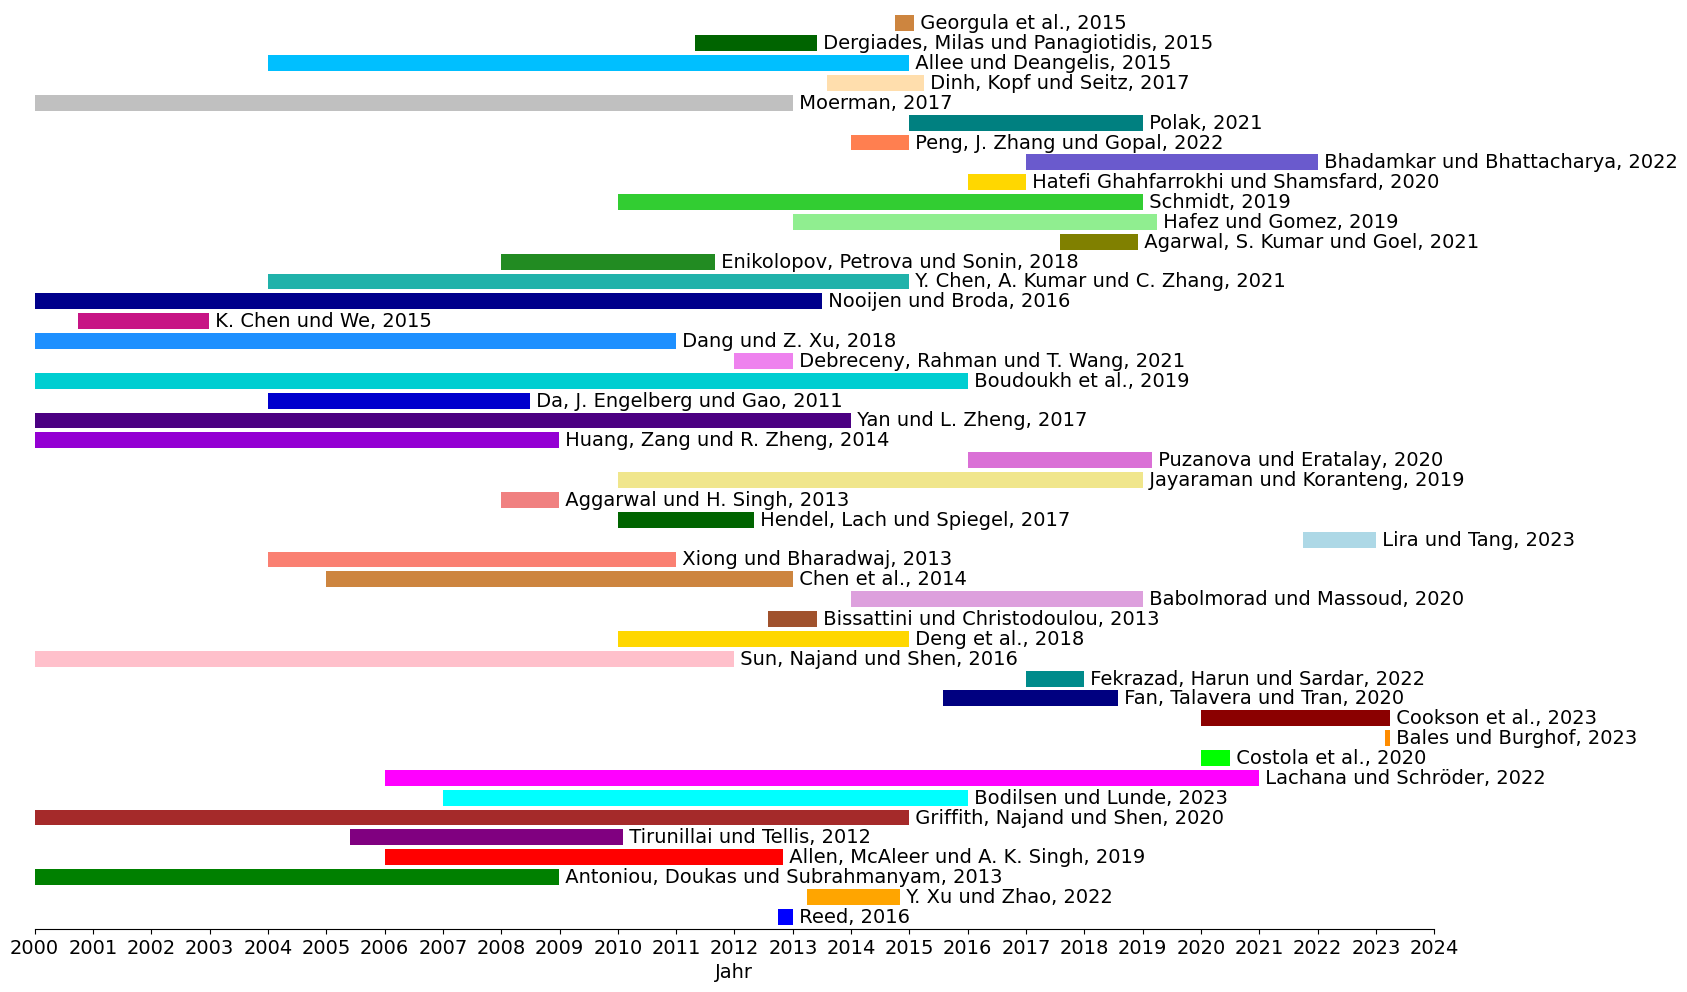

In [115]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Studiendaten
studies = [
    ("A Study of Social Network Effects on the Stock Market - Reed, 2016", "2012-10-01", "2012-12-31", "blue"),
    ("Can Sentiments on Macroeconomic News Explain Stock Returns? - Y. Xu und Zhao, 2022", "2013-04-01", "2014-10-31", "orange"),
    ("Cognitive Dissonance, Sentiment, and Momentum - Antoniou, Doukas und Subrahmanyam, 2013", "1967-01-01", "2008-12-31", "green"),
    ("Daily market news sentiment and stock prices - Allen, McAleer und A. K. Singh, 2019", "2006-01-01", "2012-10-31", "red"),
    ("Does Chatter Really Matter? Dynamics of User-Generated Content and Stock Performance - Tirunillai und Tellis, 2012", "2005-06-01", "2010-01-31", "purple"),
    ("Emotions in the Stock Market - Griffith, Najand und Shen, 2020", "1998-01-01", "2014-12-31", "brown"),
    ("Exploiting News Analytics for Volatility Forecasting - Bodilsen und Lunde, 2023", "2007-01-01", "2015-12-31", "cyan"),
    ("Investor Sentiment, Social Media and Stock Returns: Wisdom of Crowds or Power of Words? - Lachana und Schröder, 2022", "2006-01-01", "2020-12-31", "magenta"),
    ("Machine Learning Sentiment Analysis, Covid-19 News and Stock Market Reactions - Costola et al., 2020", "2020-01-01", "2020-06-30", "lime"),
    ("Public Attention, Sentiment and the Default of Silicon Valley Bank - Bales und Burghof, 2023", "2023-03-01", "2023-03-31", "darkorange"),
    ("Social Media as a Bank Run Catalyst - Cookson et al., 2023", "2020-01-01", "2023-03-31", "darkred"),
    ("Social media bots and stock markets - Fan, Talavera und Tran, 2020", "2015-08-01", "2018-07-31", "navy"),
    ("Social media sentiment and the stock market - Fekrazad, Harun und Sardar, 2022", "2017-01-01", "2017-12-31", "darkcyan"),
    ("Stock Return Predictability and Investor Sentiment: A High-Frequency Perspective - Sun, Najand und Shen, 2016", "1998-01-01", "2011-12-31", "pink"),
    ("The Interaction between Microblog Sentiment and Stock Return: An Empirical Examination - Deng et al., 2018", "2010-01-01", "2014-12-31", "gold"),
    ("Web Sentiment Analysis for Revealing Public Opinions, Trends and Making Good Financial Decisions - Bissattini und Christodoulou, 2013", "2012-08-01", "2013-05-31", "sienna"),
    ("When Sentiment Is News: The Polarity Pattern Approach - Babolmorad und Massoud, 2020", "2014-01-01", "2018-12-31", "plum"),
    ("Wisdom of Crowds: The Value of Stock Opinions Transmitted Through Social Media - Chen et al., 2014", "2005-01-01", "2012-12-31", "peru"),
    ("Asymmetric Roles of Advertising and Marketing Capability in Financial Returns to News - Xiong und Bharadwaj, 2013", "2004-01-01", "2010-12-31", "salmon"),
    ("Can ChatGPT Forecast Stock Price Movements? Return Predictability and Large Language Models - Lopez-Lira und Tang, 2023", "2021-10-01", "2022-12-31", "lightblue"),
    ("Consumers' activism: the cottage cheese boycott - Hendel, Lach und Spiegel, 2017", "2010-01-01", "2012-04-30", "darkgreen"),
    ("Differential Influence of Blogs Across Different Stages of Decision Making: The Case of Venture Capitalists - Aggarwal und H. Singh, 2013", "2008-01-01", "2008-12-31", "lightcoral"),
    ("Does Celebrity Social Media Sentiment Predict Stock Market and Cryptocurrency Returns? - Jayaraman und Koranteng, 2019", "2010-01-01", "2018-12-31", "khaki"),
    ("Effect of real estate news sentiments on the stock returns of Swedbank and SEB Bank - Puzanova und Eratalay, 2020", "2016-01-01", "2019-02-28", "orchid"),
    ("Evidence on the Information Content of Text in Analyst Reports - Huang, Zang und R. Zheng, 2014", "1996-01-01", "2008-12-31", "darkviolet"),
    ("Fundamental Analysis and the Cross-Section of Stock Returns: A Data-Mining Approach - Yan und L. Zheng, 2017", "1963-01-01", "2013-12-31", "indigo"),
    ("In Search of Attention - Da, J. Engelberg und Gao, 2011", "2004-01-01", "2008-06-30", "mediumblue"),
    ("Information, Trading, and Volatility: Evidence from Firm-Specific News - Boudoukh et al., 2019", "2000-01-01", "2015-12-31", "darkturquoise"),
    ("Is User-Generated Twittersphere Activity Associated with Stock Market Reactions to 8-K Filings? - Debreceny, Rahman und T. Wang, 2021", "2012-01-01", "2012-12-31", "violet"),
    ("Market Sentiment and Innovation Activities - Dang und Z. Xu, 2018", "1985-01-01", "2010-12-31", "dodgerblue"),
    ("Media Coverage and Stock Return in the Taiwan Stock Market - K.-Y. Wang, C.-K. Chen und We, 2015", "2000-10-01", "2002-12-31", "mediumvioletred"),
    ("Predicting Equity Markets with Digital Online Media Sentiment: Evidence from Markov-switching Models - Nooĳen und Broda, 2016", "1998-01-01", "2013-06-30", "darkblue"),
    ("Searching for Gambles: Gambling Sentiment and Stock Market Outcomes - Y. Chen, A. Kumar und C. Zhang, 2021", "2004-01-01", "2014-12-31", "lightseagreen"),
    ("Social Media and Corruption - Enikolopov, Petrova und Sonin, 2018", "2008-01-01", "2011-08-31", "forestgreen"),
    ("Social Media and the Stock Markets: An Emerging Market Perspective - Agarwal, S. Kumar und Goel, 2021", "2017-08-01", "2018-11-30", "olive"),
    ("Socially Responsible Investing: Combining ESG Ratings with News Sentiment Generates Alpha - Hafez und Gomez, 2019", "2013-01-01", "2019-03-31", "lightgreen"),
    ("Sustainable News – A Sentiment Analysis of the Effect of ESG Information on Stock Prices - Schmidt, 2019", "2010-01-01", "2018-12-31", "limegreen"),
    ("Tehran stock exchange prediction using sentiment analysis of online textual opinions - Hatefi Ghahfarrokhi und Shamsfard, 2020", "2016-01-01", "2016-12-31", "gold"),
    ("Tesla Inc. Stock Prediction using Sentiment Analysis - Bhadamkar und Bhattacharya, 2022", "2017-01-01", "2021-12-31", "slateblue"),
    ("The Good, the Bad, and the Social Media: Financial Implications of Social Media Reactions to Firm-Related News - Peng, J. Zhang und Gopal, 2022", "2014-01-01", "2014-12-31", "coral"),
    ("The Impact of Investor Sentiment on Direction of Stock Price Changes: Evidence from the Polish Stock Market - Polak, 2021", "2015-01-01", "2018-12-31", "teal"),
    ("The Informational Role of the Media in Private Lending - Bushman, Williams und Wittenberg-Moerman, 2017", "2000-01-01", "2012-12-31", "silver"),
    ("The Power of Social Media — Shareholder Activism via Twitter and a Firm's Market Value - Dinh, Kopf und Seitz, 2017", "2013-08-01", "2015-03-31", "navajowhite"),
    ("The Structure of Voluntary Disclosure Narratives: Evidence from Tone Dispersion - Allee und Deangelis, 2015", "2004-01-01", "2014-12-31", "deepskyblue"),
    ("Tweets, Google trends, and sovereign spreads in the GIIPS - Dergiades, Milas und Panagiotidis, 2015", "2011-05-01", "2013-05-31", "darkgreen"),
    ("Using Time-Series and Sentiment Analysis to Detect the Determinants of Bitcoin Prices - Georgula et al., 2015", "2014-10-01", "2015-01-31", "peru"),
]

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(17, 10))

# Für jede Studie Balken hinzufügen
for i, (title, start, end, color) in enumerate(studies):
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')
    
    # Wenn Startdatum vor 2000 liegt, es auf 2000 setzen
    if start_date < datetime(2000, 1, 1):
        start_date = datetime(2000, 1, 1)
        
    # Wenn Enddatum nach 2024 liegt, es auf 01.01.2024 setzen
    if end_date > datetime(2024, 1, 1):
        end_date = datetime(2024, 1, 1)
        
    ax.barh(i, (end_date - start_date).days, left=start_date, color=color)
    # Autor und Jahr für die Legende extrahieren
    author_year = title.split("-")[-1].strip()
    ax.text(end_date, i, ' ' + author_year, va='center', ha='left', color='black', fontsize=14)

# Einstellungen für die y-Achse
ax.set_yticks([])  
ax.set_ylim([-0.6, len(studies) - 0.3])  # Das festlegt den vertikalen Anzeigebereich

# Einstellungen für die x-Achse
ax.xaxis_date()
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(mdates.YearLocator())  # Setzt die Hauptmarkierungen auf Jahre
ax.xaxis.set_major_formatter(date_format)
ax.set_xlim([datetime(2000, 1, 1), datetime(2024, 1, 1)])  # Setze den Anzeigebereich der x-Achse

# Layout anpassen
ax.set_xlabel("Jahr", fontsize=14)
#ax.set_title("Untersuchungszeiträume der Studien")
plt.tight_layout()

# Entferne alle Ränder, bis auf die x-Achse
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Anpassung der Schriftgröße der Jahresticks
ax.tick_params(axis='x', labelsize=14)

# Grafik als PDF speichern
plt.savefig('Graphics/zeitliche Studienübersicht.pdf', bbox_inches='tight')
plt.show()